# Churn Prediction for a Telecommunications Company

Customer churn refers to a percentage of customers that stopped purchasing the goods or service of a company during a period of time [Learn More about Customer Churn](https://mailchimp.com/resources/customer-churn/#:~:text=Customer%20churn%20is%20the%20percentage%20of%20customers%20who,is%20something%20that%20all%20businesses%20want%20to%20avoid.). In our case, we are dealing with a telecommunications company. The goal is to predict customers that will stop using the company's service.

## Importing the Necessary Libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## Data Importation and Cleaning

In the section, we will be importing our dataset, taking care of missing values, checking if columns have the right data type, creating new columns, dropping unnecessary columns e.t.c

In [2]:
df = pd.read_csv("/workspaces/FLiT-Apprenticeship-Data-Science-Projects/Project_5 Churn-Prediction-Model-with-Deployment/Telecoms Company data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#getting the shape of our dataset, i.e, the number of rows and columns
df.shape

(7043, 21)

In [4]:
#getting a summary of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Upon further investigation, we can see that some of our columns have the wrong datatype so we will take care of it as we move further. This should be done to ensure easy data visualization and model building.

Only one column has the wrong data type and that is our `TotalCharges` column. We will take care of it in the following steps:
* We investigate why pandas recognized it as an `object` datatype. This could be because a value was wrongly inputted. Once we figure that out and take care of it;
* We will then convert to the appropriate data type using a function in Pandas called the `astype()` function  

In [5]:
#investigation
df["TotalCharges"].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

Using the `value_counts()` function, we can see that some of the values in that column are empty spaces. This is why pandas recognized the entire column as object. 

In [6]:
#filling the missing values with zeros
df["TotalCharges"]= df["TotalCharges"].replace(" ", 0)

In [7]:
#following the next step, we can now change the datatype to the appropriate one
df["TotalCharges"] = df["TotalCharges"].astype("float64")

In [8]:
#lets recheck our dataframe to confirm the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Now that is done, we will move forward to perform further data cleaning and analysis

In [9]:
#checking the unqiue values we have in each column in our data frame
for column in df.columns:
    print(column, ":", df[column].nunique())

customerID : 7043
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 73
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1585
TotalCharges : 6531
Churn : 2


Using a `for loop`, we were able to get the number of unique elements in each of our columns. This will help to perform our
`univariate and bivariate analysis` smoothly.

In [10]:
df.describe() #getting a statistics summary of our dataset

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Inference: from the above:
* Senior Citizen is categorical hence the 25%-50%-75% distribution is not proper
* The average monthly charges is USD 64.76

In [11]:
#copying our data set before further processing
data = df.copy()

The `Tenure` column in our dataset is used to signify how long a customer has been using our company's service. So based on the information, we will be creating a tenure group, i.e., we will be grouping our customers into tenure groups based on how long they have been customers

In [12]:
#creating a function we will apply on our tenure column to create our groups
def tenure_groups(row):
    if row["tenure"] <= 12:
        tenure_group = "1-12"
    elif 12 < row["tenure"] <= 24:
        tenure_group = "13-24"
    elif 24 < row["tenure"] <= 36:
        tenure_group = "25-36"
    elif 36 < row["tenure"] <= 48:
        tenure_group = "37-48"
    elif 48 < row["tenure"] <= 60:
        tenure_group = "49-60"
    else:
        tenure_group = "61-72"
    return tenure_group

In [13]:
data["tenure_groups"] = data.apply(tenure_groups, axis = 1)

In [14]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groups
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [15]:
#getting the count of tenure groupd in our dataset
data["tenure_groups"].value_counts()

tenure_groups
1-12     2186
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

## Data Exploration

In this section, we will be conducting a variety of analysis to find trends, patterns amongst variables and gain more insight of our dataset.

### Univariate Analysis

Univariate analysis involves finding a oattern in a single variable.

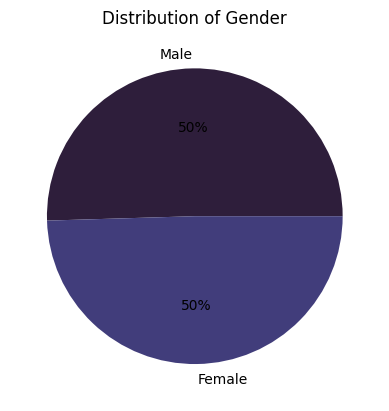

In [16]:
#gender distribution
gender = dict(df.gender.value_counts())
palette = sns.color_palette("mako")
plt.pie(gender.values(), labels = gender.keys(), autopct = "%.0f%%", colors = palette)
plt.title("Distribution of Gender")
plt.show();

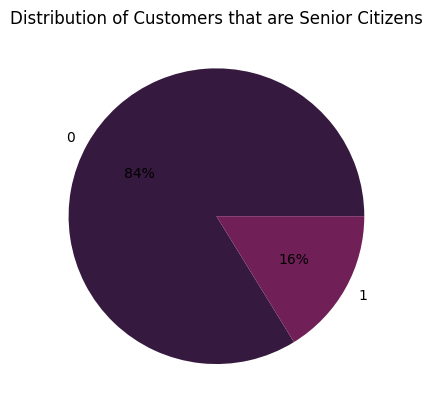

In [17]:
#senior citizen distribution
sen = dict(df["SeniorCitizen"].value_counts())
palette = sns.color_palette("rocket")
plt.pie(sen.values(), labels = sen.keys(), autopct = "%.0f%%", colors = palette)
plt.title("Distribution of Customers that are Senior Citizens")
plt.show();

From the above visualization we can deduce that majority of the customers are not senior citizens. 

In [ ]:
# distribution of our target variable - the churn column
churn = df["Churn"].value_counts().reset_index()
churn.columns = ["Churn", "count"]
fig = px.pie(churn, names = "Churn", values = "count", title = "Distribution of Customer's Churn")
fig.update_traces(textinfo = "percent+label", pull = 0.05)
fig.show();

Inference: From the above, we can conclude that we are dealing with an imbalanced dataset

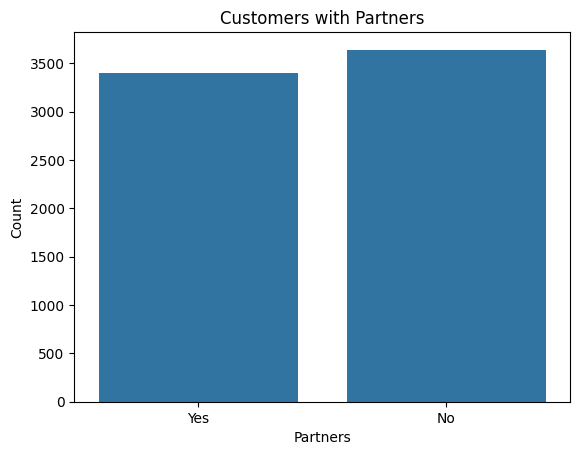

In [24]:
#distribution of customers with partners
sns.countplot(df, x = "Partner")
plt.title("Customers with Partners")
plt.xlabel("Partners")
plt.ylabel("Count");

Text(0, 0.5, 'Count')

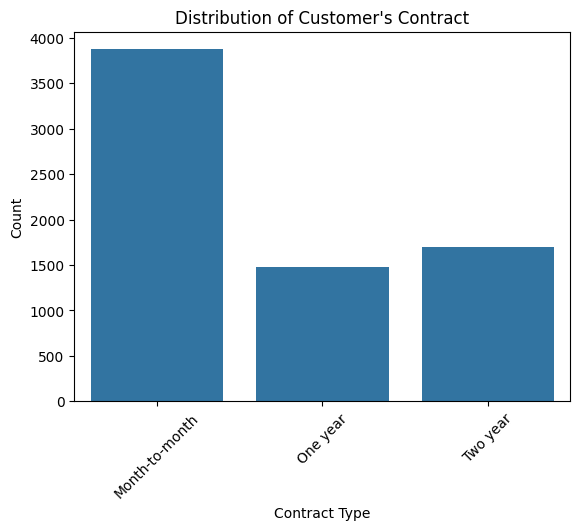

In [25]:
#checking the distribution of customers contract
sns.countplot(df, x = "Contract")
plt.title("Distribution of Customer's Contract")
plt.xlabel("Contract Type")
plt.xticks(rotation = 45)
plt.ylabel("Count")

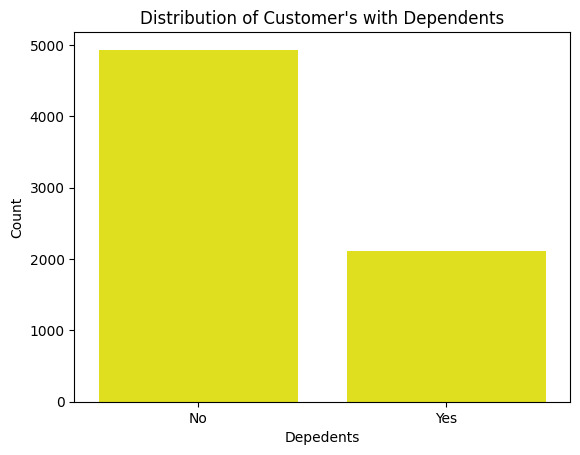

In [26]:
#checking the distribution of customers with dependents
sns.countplot(df, x = "Dependents", color = "yellow")
plt.title("Distribution of Customer's with Dependents")
plt.xlabel("Depedents")
plt.ylabel("Count");

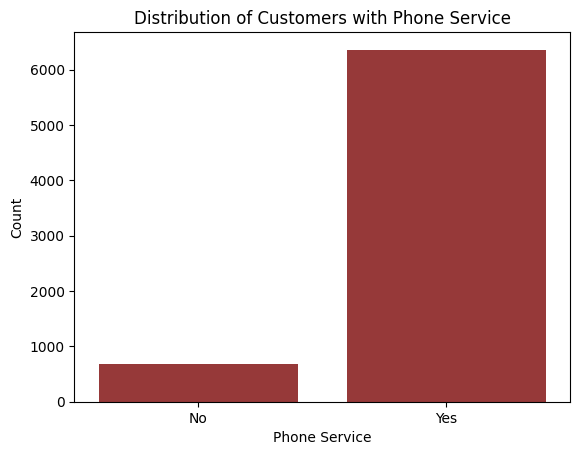

In [27]:
#distribution of customers with phone service
sns.countplot(df, x = "PhoneService", color = "brown")
plt.xlabel("Phone Service")
plt.ylabel("Count")
plt.title("Distribution of Customers with Phone Service");

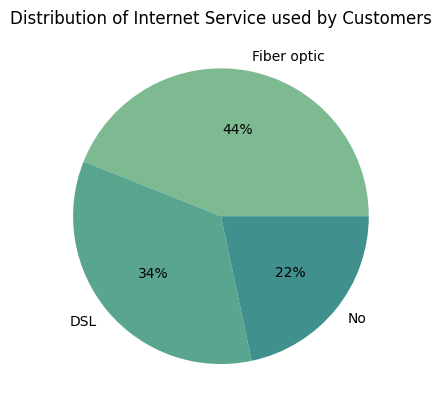

In [28]:
#distribution of internet service type
internet = dict(df["InternetService"].value_counts())
palette = sns.color_palette("crest")
plt.pie(internet.values(), labels = internet.keys(), autopct = "%.0f%%", colors = palette)
plt.title("Distribution of Internet Service used by Customers")
plt.show();

### Bivariate Analysis

Bivariate analysis involves the finding of trends and patterns between two variables[columns] in a dataset

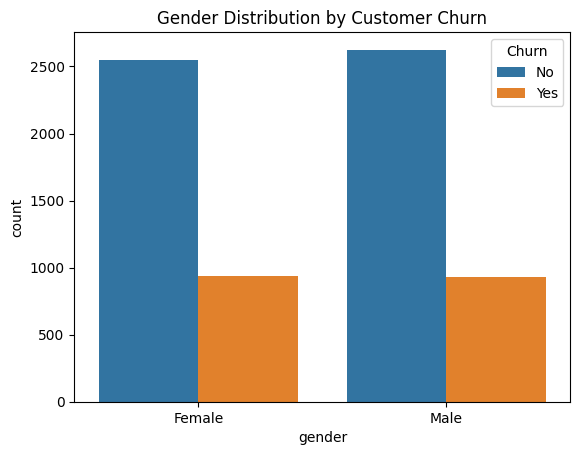

In [29]:
#lets find a relationship between the genders in our dataset aand alos our churn target
sns.countplot(df, x = "gender", hue = "Churn")
plt.title("Gender Distribution by Customer Churn");

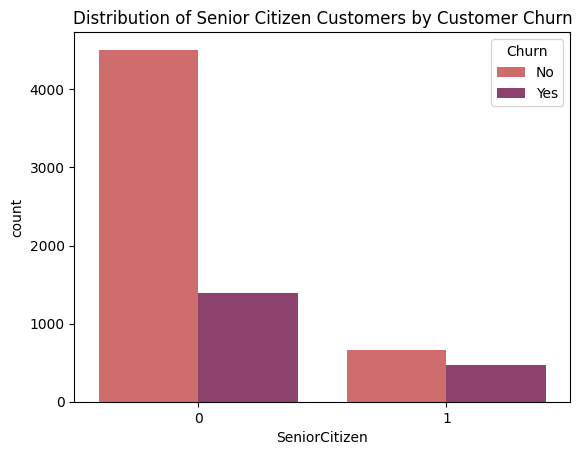

In [30]:
#senior citizen distribution by customer churn
sns.countplot(df, x = "SeniorCitizen", hue = "Churn", palette = "flare")
plt.title("Distribution of Senior Citizen Customers by Customer Churn");

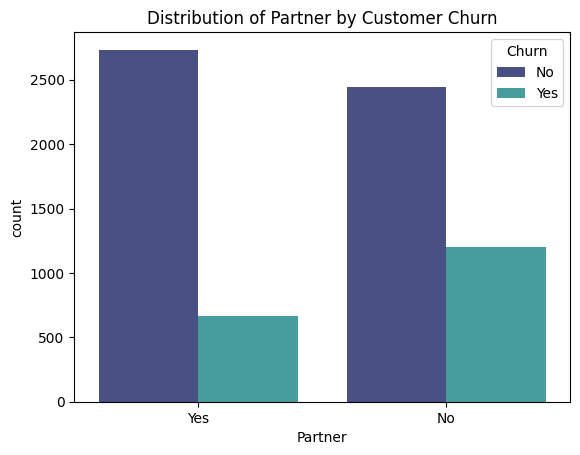

In [31]:
#partner distribution by churn
sns.countplot(data, x = "Partner", hue = "Churn", palette = "mako")
plt.title("Distribution of Partner by Customer Churn");

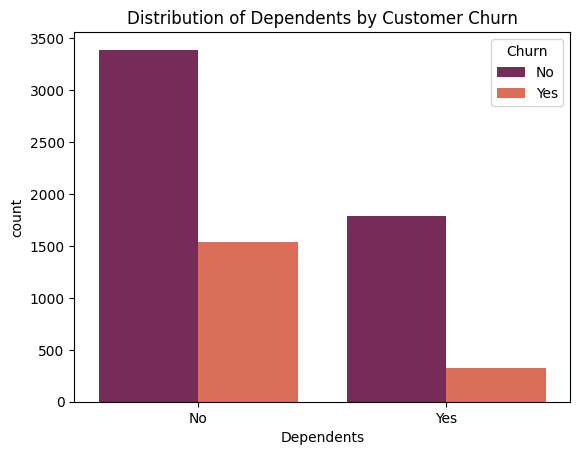

In [32]:
#dependent
sns.countplot(data, x = "Dependents", hue = "Churn", palette = "rocket")
plt.title("Distribution of Dependents by Customer Churn");

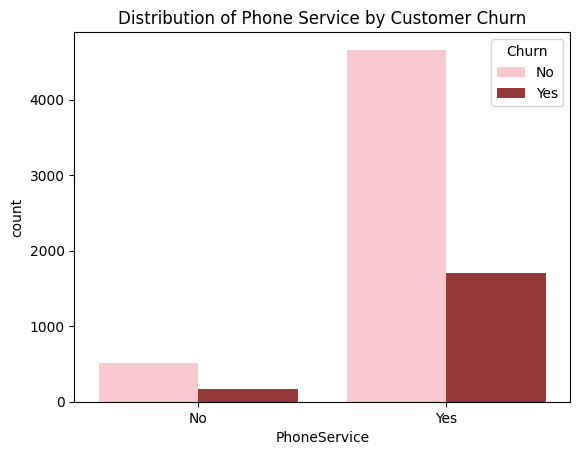

In [34]:
#Phone Service
palette = {"No":"pink", "Yes":"brown"}
sns.countplot(data, x = "PhoneService", hue = "Churn", palette = palette)
plt.title("Distribution of Phone Service by Customer Churn");

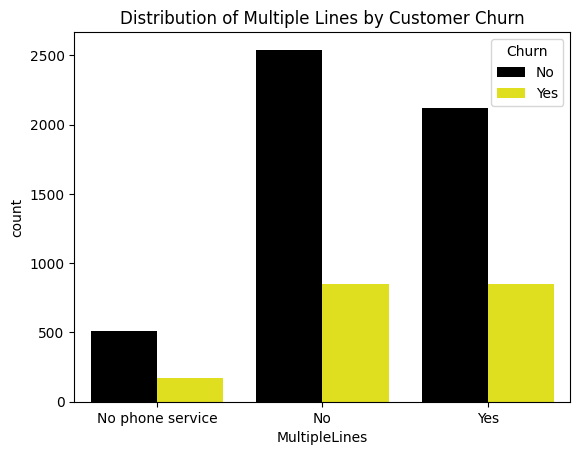

In [35]:
#Phone Service
palette = {"No":"black", "Yes":"yellow"}
sns.countplot(data, x = "MultipleLines", hue = "Churn", palette = palette)
plt.title("Distribution of Multiple Lines by Customer Churn");

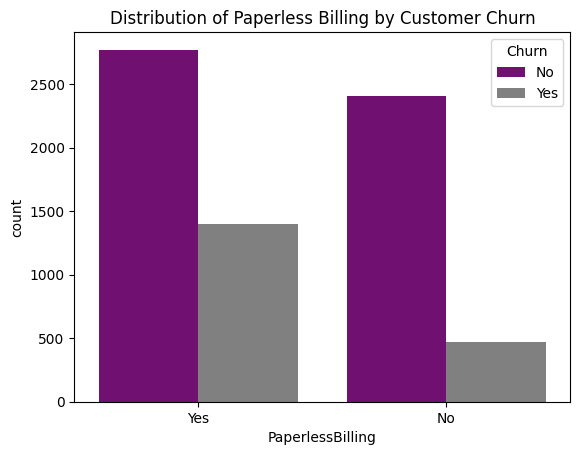

In [36]:
#Paperlessbilling
palette = {"No":"purple", "Yes":"grey"}
sns.countplot(data, x = "PaperlessBilling", hue = "Churn", palette = palette)
plt.title("Distribution of Paperless Billing by Customer Churn");

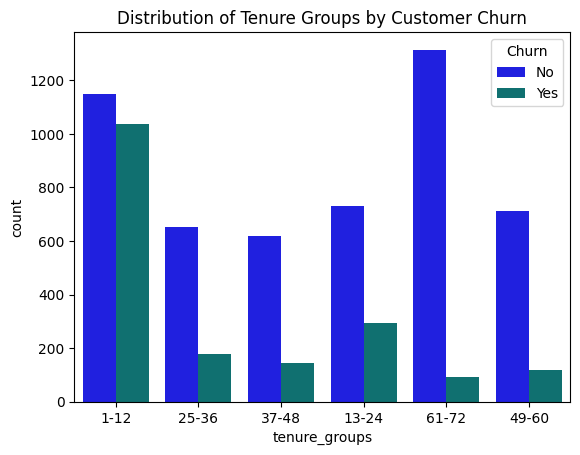

In [33]:
#tenure group
palette = {"No":"blue", "Yes":"teal"}
sns.countplot(data, x = "tenure_groups", hue = "Churn", palette = palette)
plt.title("Distribution of Tenure Groups by Customer Churn");

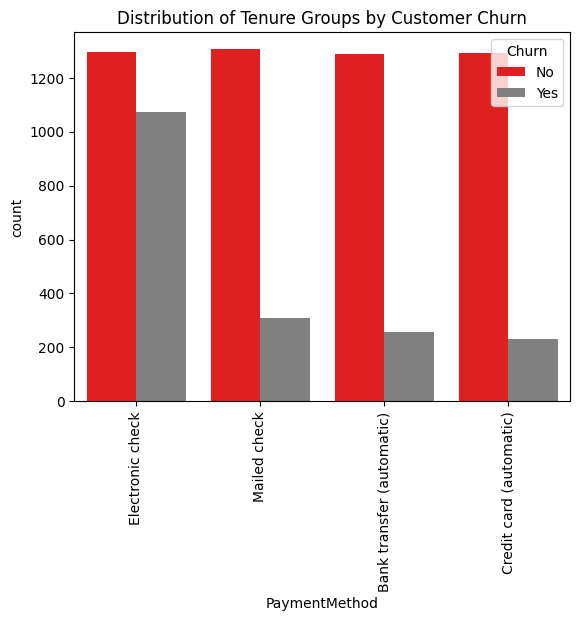

In [36]:
#payment methods
palette = {"No":"red", "Yes":"grey"}
sns.countplot(data, x = "PaymentMethod", hue = "Churn", palette = palette)
plt.xticks(rotation=90)
plt.title("Distribution of Tenure Groups by Customer Churn");

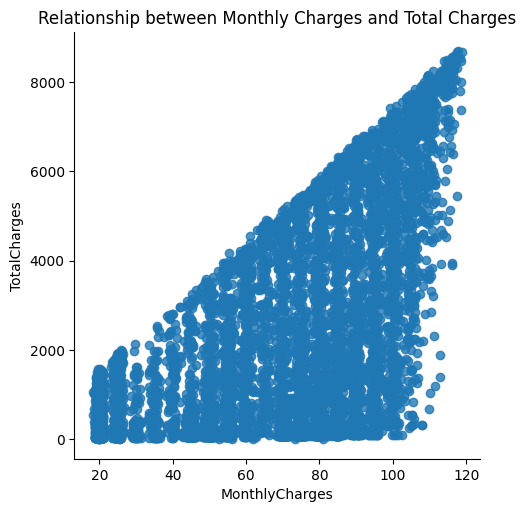

In [37]:
#making a regression plot for our numericla column
sns.lmplot(data, x = "MonthlyCharges", y = "TotalCharges", fit_reg = False)
plt.title("Relationship between Monthly Charges and Total Charges");

**Inference: From the above regression plot we can observe that there is a direct relationshi